In [1]:
%load_ext autoreload
%autoreload 2  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
import seaborn as sns
from pathlib import Path
import os
basedir = Path('/home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# folder1 = basedir / 'reconstruction/predictions_r1_t500'
# folder2 = basedir / 'reconstruction/predictions_r10_t50'
folders = []
names = []
for folder in os.listdir(basedir / "ddim"):
    if "400" not in folder:
        folders.append(basedir / "ddim" / folder)
        names.append("DDIM_" + folder.split("_")[3] + "_" + folder.split("_")[7])
mols = [utils.read_molecules(folder) for folder in folders]
for name, folder in zip(names, folders):
    print(name, ":", folder)

DDIM_500_linear : /home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp/ddim/r1_t500_ddim_500_nu_0_n100_linear
DDIM_250_linear : /home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp/ddim/r1_t500_ddim_250_nu_0_n100_linear
DDIM_100_linear : /home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp/ddim/r1_t500_ddim_100_nu_0_n100_linear
DDIM_50_linear : /home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp/ddim/r1_t500_ddim_50_nu_0_n100_linear
DDIM_500_quad : /home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp/ddim/r1_t500_ddim_500_nu_0_n100_quad
DDIM_250_quad : /home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp/ddim/r1_t500_ddim_250_nu_0_n100_quad
DDIM_100_quad : /home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp/ddim/r1_t500_dd

In [3]:
dfs = [utils.read_metrics(folder) for folder in folders]
print([len(df) for df in dfs])
dfs[0].head()

[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


,ligand,QED,SA,Lipinski,Vina,indices
0,4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw...,0.258261,0.52,4,5.8,0
1,4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw...,0.145378,0.61,4,6.2,1
2,4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw...,0.359825,0.48,5,6.8,2
3,4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw...,None,None,None,6.4,3
4,4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw...,0.341437,0.55,4,6.4,4


In [4]:
N = 5
dfs_topN = [
    utils.find_top_N(df.copy(), N) 
    for df in dfs
    ]
names_topN = [name + f'_top{N}' for name in names]
print([len(df) for df in dfs_topN])

Random pocket id: 94, name: 3jyh-A-rec-3n0t-opy-lig-tt-min-0-pocket10_3jyh-A-rec-3n0t-opy-lig-tt-min-0_gen.sdf
Random pocket id: 24, name: 1k9t-A-rec-2wlz-dio-lig-tt-min-0-pocket10_1k9t-A-rec-2wlz-dio-lig-tt-min-0_gen.sdf
Random pocket id: 4, name: 4h3c-A-rec-5cqj-53q-lig-tt-docked-2-pocket10_4h3c-A-rec-5cqj-53q-lig-tt-docked-2_gen.sdf
Random pocket id: 42, name: 3ej8-A-rec-2nsi-itu-lig-tt-min-0-pocket10_3ej8-A-rec-2nsi-itu-lig-tt-min-0_gen.sdf
Random pocket id: 21, name: 1d7j-A-rec-1tco-fk5-lig-tt-docked-0-pocket10_1d7j-A-rec-1tco-fk5-lig-tt-docked-0_gen.sdf
Random pocket id: 81, name: 1ai4-A-rec-1ai5-mnp-lig-tt-docked-0-pocket10_1ai4-A-rec-1ai5-mnp-lig-tt-docked-0_gen.sdf
Random pocket id: 32, name: 4bel-A-rec-2ewy-dbo-lig-tt-min-0-pocket10_4bel-A-rec-2ewy-dbo-lig-tt-min-0_gen.sdf
Random pocket id: 30, name: 3tym-A-rec-3n5v-xfh-lig-tt-min-0-pocket10_3tym-A-rec-3n5v-xfh-lig-tt-min-0_gen.sdf
[500, 500, 500, 500, 500, 500, 500, 500]


In [5]:
labels = ["linear", "quad", "linear_top5", "quad_top5"]
data_to_plot = {label: {"dfs": [], "names": []} for label in labels}
for name, df in zip(names + names_topN, dfs + dfs_topN):
    if "linear" in name:
        if "top" in name:
            data_to_plot["linear_top5"]["dfs"].append(df)
            data_to_plot["linear_top5"]["names"].append(name)
        else:
            data_to_plot["linear"]["dfs"].append(df)
            data_to_plot["linear"]["names"].append(name)
    elif "quad" in name:
        if "top" in name:
            data_to_plot["quad_top5"]["dfs"].append(df)
            data_to_plot["quad_top5"]["names"].append(name)
        else:
            data_to_plot["quad"]["dfs"].append(df)
            data_to_plot["quad"]["names"].append(name)

In [6]:
a = [(key, value["names"]) for key, value in data_to_plot.items()]
a

[('linear',
  ['DDIM_500_linear', 'DDIM_250_linear', 'DDIM_100_linear', 'DDIM_50_linear']),
 ('quad', ['DDIM_500_quad', 'DDIM_250_quad', 'DDIM_100_quad', 'DDIM_50_quad']),
 ('linear_top5',
  ['DDIM_500_linear_top5',
   'DDIM_250_linear_top5',
   'DDIM_100_linear_top5',
   'DDIM_50_linear_top5']),
 ('quad_top5',
  ['DDIM_500_quad_top5',
   'DDIM_250_quad_top5',
   'DDIM_100_quad_top5',
   'DDIM_50_quad_top5'])]

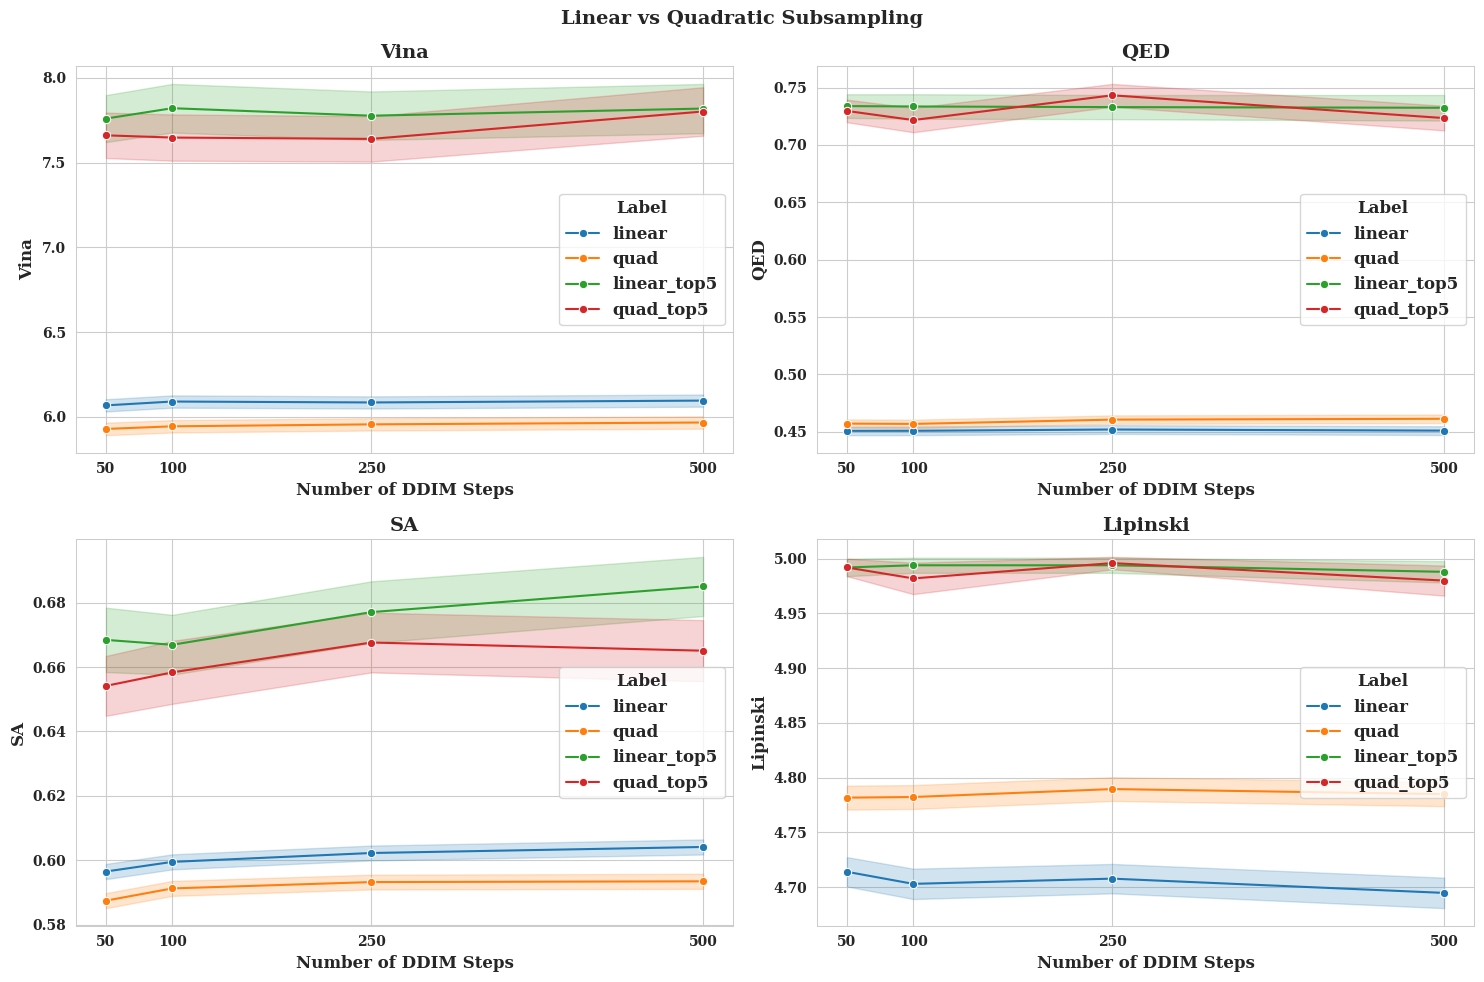

In [11]:
img_path = "/home/domainHomes/ssakharov/master_thesis/imgs"
utils.plot_lineplot_vs(data_to_plot, rows=2, figsize=(15,10), save=img_path + "/linear_vs_quad.pdf", suptitle="Linear vs Quadratic Subsampling", xlabel="Number of DDIM Steps")

In [12]:
for df, name in zip(dfs + dfs_topN, names + names_topN):
    utils.print_df_info(df ,name)

DDIM_500_linear
QED mean: 0.45, QED std: 0.19, QED max: 0.94, QED min: 0.02
SA mean: 0.60, SA std: 0.12, SA max: 0.99, SA min: 0.23
Lipinski mean: 4.69, Lipinski std: 0.69, Lipinski max: 5.00, Lipinski min: 0.00
Vina mean: 6.10, Vina std: 1.79, Vina max: 14.00, Vina min: -0.00
DDIM_250_linear
QED mean: 0.45, QED std: 0.19, QED max: 0.94, QED min: 0.01
SA mean: 0.60, SA std: 0.11, SA max: 1.00, SA min: 0.23
Lipinski mean: 4.71, Lipinski std: 0.67, Lipinski max: 5.00, Lipinski min: 0.00
Vina mean: 6.08, Vina std: 1.79, Vina max: 13.50, Vina min: 0.30
DDIM_100_linear
QED mean: 0.45, QED std: 0.19, QED max: 0.94, QED min: 0.01
SA mean: 0.60, SA std: 0.12, SA max: 1.00, SA min: 0.24
Lipinski mean: 4.70, Lipinski std: 0.69, Lipinski max: 5.00, Lipinski min: 0.00
Vina mean: 6.09, Vina std: 1.81, Vina max: 13.90, Vina min: 0.10
DDIM_50_linear
QED mean: 0.45, QED std: 0.19, QED max: 0.93, QED min: 0.02
SA mean: 0.60, SA std: 0.12, SA max: 1.00, SA min: 0.24
Lipinski mean: 4.71, Lipinski std: 0.